In [69]:
import pandas as pd

In [70]:
from wordcloud import WordCloud

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from statistics import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron

In [72]:
file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\SMSSpamCollection (1).txt"

df = pd.read_table(file_path, sep = '\t', header = None)

In [73]:
df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
df.head()

,0,1
0,ham,Where to get those?
1,ham,K go and sleep well. Take rest:-).
2,spam,22 days to kick off! For Euro2004 U will be ke...
3,ham,When i have stuff to sell i.ll tell you
4,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...


In [74]:
df.rename(columns={0: 'label', 1:'sms_message'}, inplace=True)
df.head()

,label,sms_message
0,ham,Where to get those?
1,ham,K go and sleep well. Take rest:-).
2,spam,22 days to kick off! For Euro2004 U will be ke...
3,ham,When i have stuff to sell i.ll tell you
4,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...


In [75]:
df['label'] = df['label'].replace('ham',0)
df['label'] = df['label'].replace('spam',1)
df.head()

,label,sms_message
0,0,Where to get those?
1,0,K go and sleep well. Take rest:-).
2,1,22 days to kick off! For Euro2004 U will be ke...
3,0,When i have stuff to sell i.ll tell you
4,1,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...


In [76]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], random_state =42)

X_train_sms.head()

4281                        I meant middle left or right?
585     Urgent! Please call 09061743811 from landline....
4545                     Yeah, we got one lined up for us
3034    You have won a guaranteed £200 award or even £...
2758    Can come my room but cannot come my house cos ...
Name: sms_message, dtype: object

In [77]:
count_vector = CountVectorizer(ngram_range = (1,1), lowercase = True, stop_words = 'english')

In [78]:
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()

In [79]:
X_train_feature_list = count_vector.get_feature_names_out()
print(X_train_feature_list)

['00' '000' '000pes' ... 'zoom' 'ú1' '〨ud']


In [80]:
frequencey_matrix_X_train = pd.DataFrame(X_train, columns = X_train_feature_list)
frequencey_matrix_X_train.head()

,00,000,000pes,008704050406,0089,0121,01223585334,02,0207,02072069400,...,zaher,zealand,zebra,zed,zhong,zoe,zogtorius,zoom,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
MNB = MultinomialNB()
MNB.fit(X_train,Y_train)

MultinomialNB()

In [82]:
predictions = MNB.predict(X_test)

In [83]:
accuracy_score(predictions,Y_test)

0.9863603732950467

In [84]:
precision_score(predictions, Y_test)

0.9385474860335196

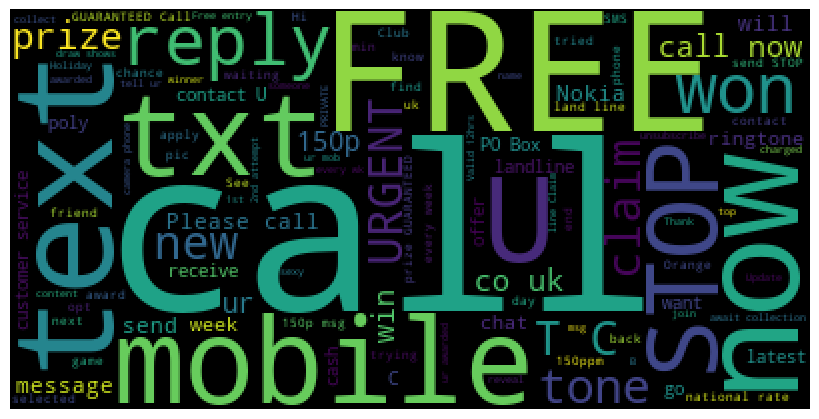

In [85]:
spam_words = ' '.join(X_train_sms[Y_train == 1])
wordcloud = WordCloud( max_words=150).generate(spam_words)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

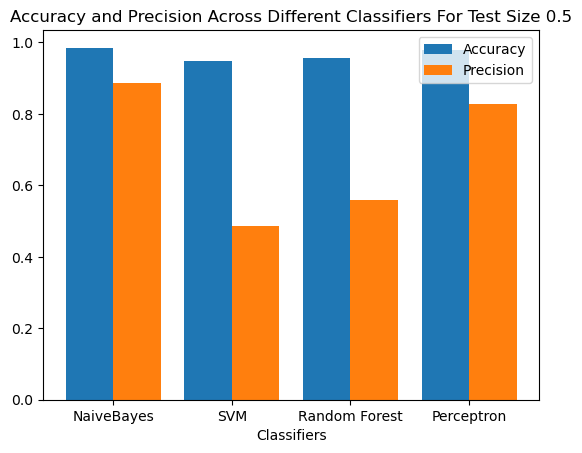

In [101]:


SVM = SVC(kernel = 'rbf')
RF = RandomForestClassifier()
P = Perceptron(random_state = 42)


X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


  
X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()


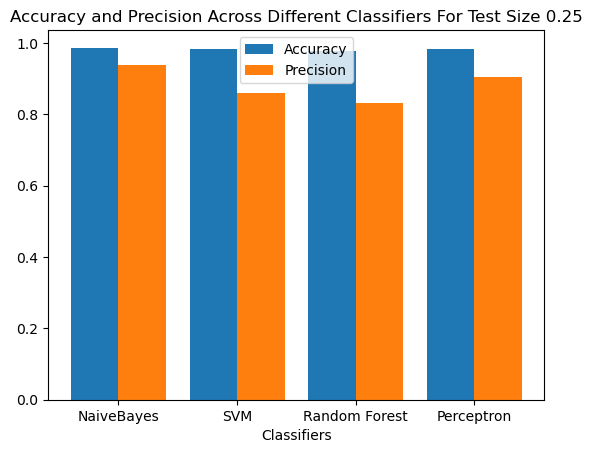

In [102]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

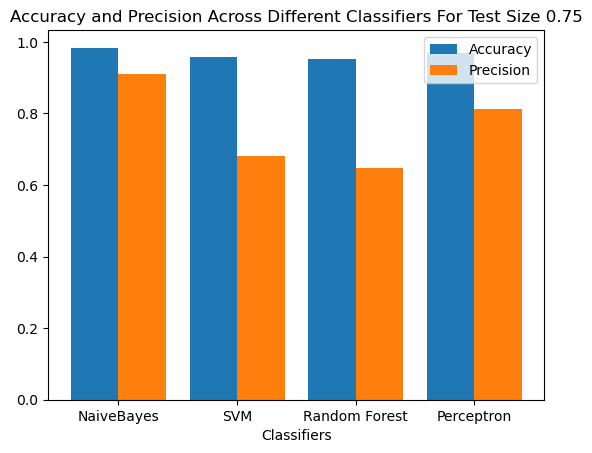

In [103]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df['sms_message'], df['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()

In [104]:
X = count_vector.fit_transform(df['sms_message'])
Y = df['label']


In [105]:
kf = KFold(n_splits = 5)

In [106]:
accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")

    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
    

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.979372197309417
 Precision: 0.9444444444444444


Fold 1
 Accuracy: 0.9757847533632287
 Precision: 0.910828025477707


Fold 2
 Accuracy: 0.9829443447037702
 Precision: 0.9710982658959537


Fold 3
 Accuracy: 0.9856373429084381
 Precision: 0.9637681159420289


Fold 4
 Accuracy: 0.9757630161579892
 Precision: 0.9555555555555556


 Mean Accuracy: 0.9799003308885686
 Mean Precision: 0.949138881463138


In [107]:
kf = KFold(n_splits = 10)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
 
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
  

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.9802867383512545
 Precision: 0.9428571428571428


Fold 1
 Accuracy: 0.982078853046595
 Precision: 0.9594594594594594


Fold 2
 Accuracy: 0.9802513464991023
 Precision: 0.9459459459459459


Fold 3
 Accuracy: 0.9694793536804309
 Precision: 0.8795180722891566


Fold 4
 Accuracy: 0.9712746858168761
 Precision: 0.946236559139785


Fold 5
 Accuracy: 0.9910233393177738
 Precision: 1.0


Fold 6
 Accuracy: 0.9856373429084381
 Precision: 0.975


Fold 7
 Accuracy: 0.9856373429084381
 Precision: 0.9482758620689655


Fold 8
 Accuracy: 0.9766606822262118
 Precision: 0.9701492537313433


Fold 9
 Accuracy: 0.9784560143626571
 Precision: 0.9411764705882353


 Mean Accuracy: 0.9800785699117778
 Mean Precision: 0.9508618766080034


In [108]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
   
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
   

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.97847533632287
 Precision: 0.9662162162162162


Fold 1
 Accuracy: 0.9775784753363229
 Precision: 0.9166666666666666


Fold 2
 Accuracy: 0.9766606822262118
 Precision: 0.9430379746835443


Fold 3
 Accuracy: 0.9838420107719928
 Precision: 0.9926470588235294


Fold 4
 Accuracy: 0.981149012567325
 Precision: 0.9395973154362416


 Mean Accuracy: 0.9795411034449445
 Mean Precision: 0.9516330463652396


In [109]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)


accuracy_list = []
precision_list = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}")
   
    
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    MNB.fit(X_train,Y_train)
    KFPredict = MNB.predict(X_test)
    
    accuracy = accuracy_score(KFPredict,Y_test)
    precision = precision_score(KFPredict,Y_test)
    
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    
    print(f" Accuracy: {accuracy}")
    print(f" Precision: {precision}")
    print("\n")
 

mean_accuracy = mean(accuracy_list)
mean_precision = mean(precision_list)
print(f" Mean Accuracy: {mean_accuracy}")
print(f" Mean Precision: {mean_precision}")

Fold 0
 Accuracy: 0.9767025089605734
 Precision: 0.963855421686747


Fold 1
 Accuracy: 0.982078853046595
 Precision: 0.9848484848484849


Fold 2
 Accuracy: 0.9766606822262118
 Precision: 0.881578947368421


Fold 3
 Accuracy: 0.9712746858168761
 Precision: 0.9493670886075949


Fold 4
 Accuracy: 0.9910233393177738
 Precision: 0.9863013698630136


Fold 5
 Accuracy: 0.9640933572710951
 Precision: 0.9058823529411765


Fold 6
 Accuracy: 0.9748653500897666
 Precision: 0.9852941176470589


Fold 7
 Accuracy: 0.9910233393177738
 Precision: 1.0


Fold 8
 Accuracy: 0.9802513464991023
 Precision: 0.9180327868852459


Fold 9
 Accuracy: 0.9838420107719928
 Precision: 0.9431818181818182


 Mean Accuracy: 0.9791815473317761
 Mean Precision: 0.9518342388029561


In [110]:
imbalanced_file_path = "C:\\Users\\agrim\\Python_Projects\\AI_Learning-Research\\Spam Classification\\imbalanced_spam.csv"
df3 = pd.read_csv(imbalanced_file_path, encoding='latin-1')


df3 = df3.reindex(np.random.permutation(df3.index))
df3.reset_index(inplace=True, drop=True)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,U wan 2 haf lunch i'm in da canteen now.,NaN,NaN,NaN
1,ham,Sad story of a Man - Last week was my b'day. M...,NaN,NaN,NaN
2,spam,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
3,ham,:),NaN,NaN,NaN
4,ham,Only 2% students solved this CAT question in '...,NaN,NaN,NaN


In [111]:
df3['label'] = df3['label'].replace('ham',0)
df3['label'] = df3['label'].replace('spam',1)
df3.head()

,label,email,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,U wan 2 haf lunch i'm in da canteen now.,NaN,NaN,NaN
1,0,Sad story of a Man - Last week was my b'day. M...,NaN,NaN,NaN
2,1,Want explicit SEX in 30 secs? Ring 02073162414...,NaN,NaN,NaN
3,0,:),NaN,NaN,NaN
4,0,Only 2% students solved this CAT question in '...,NaN,NaN,NaN


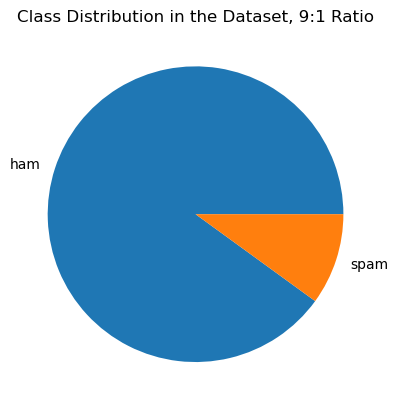

In [121]:
class_labels = ['ham','spam']
class_counts = [4500,500]
bar_colors = ['red','blue']
plt.pie(class_counts,labels = class_labels)
plt.title('Class Distribution in the Dataset, 9:1 Ratio')



plt.show()

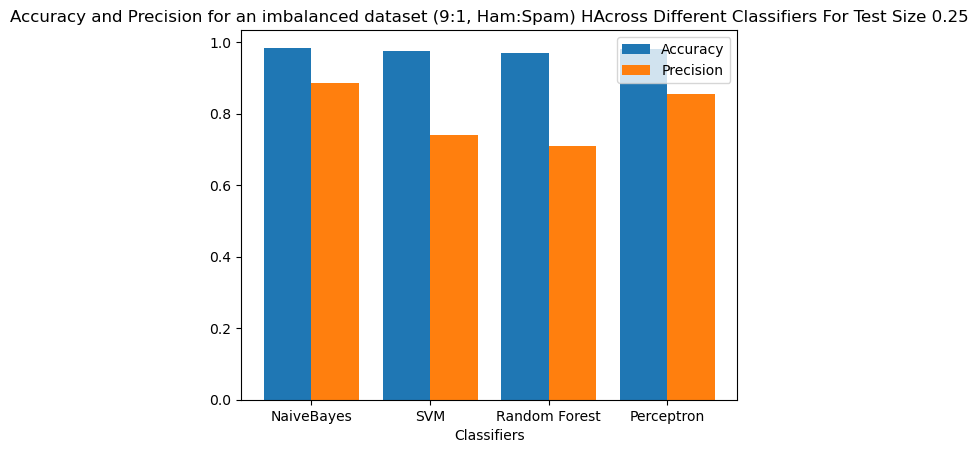

In [113]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.25, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1, Ham:Spam) HAcross Different Classifiers For Test Size 0.25")
plt.legend()
plt.show()

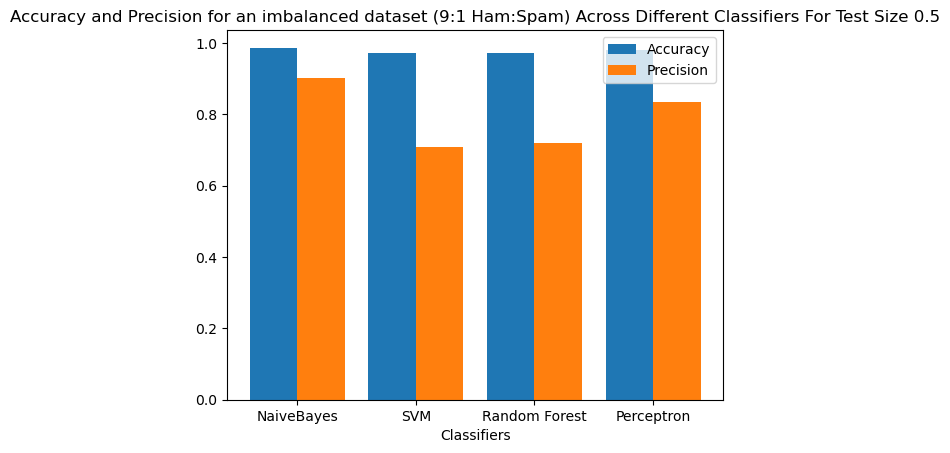

In [114]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.5, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1 Ham:Spam) Across Different Classifiers For Test Size 0.5")
plt.legend()
plt.show()

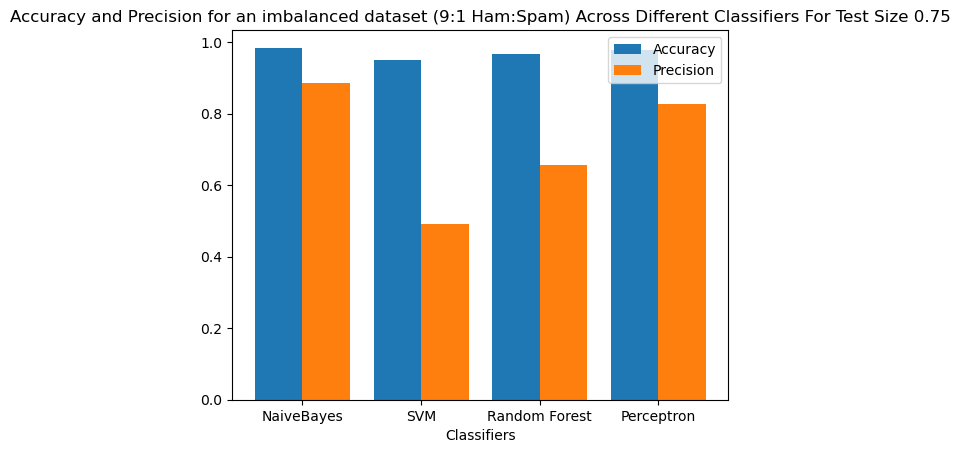

In [115]:
X_train_sms, X_test_sms, Y_train, Y_test = train_test_split(df3['email'], df3['label'], test_size = 0.75, random_state =42)
X_train = count_vector.fit_transform(X_train_sms).toarray()
X_test = count_vector.transform(X_test_sms).toarray()
MNB.fit(X_train,Y_train)
SVM.fit(X_train, Y_train)
RF.fit(X_train, Y_train)
P.fit(X_train,Y_train)


NB_accuracy = accuracy_score(MNB.predict(X_test), Y_test)
NB_precision = precision_score(MNB.predict(X_test), Y_test)
SVM_accuracy= accuracy_score(SVM.predict(X_test), Y_test)
SVM_precision = precision_score(SVM.predict(X_test), Y_test)
Random_Forest_accuracy =accuracy_score(RF.predict(X_test), Y_test)
Random_Forest_precision = precision_score(RF.predict(X_test), Y_test)
P_accuracy =accuracy_score(P.predict(X_test), Y_test)
P_precision = precision_score(P.predict(X_test), Y_test)


X = ['NaiveBayes', 'SVM', 'Random Forest', 'Perceptron']
Yaccuracy = [NB_accuracy, SVM_accuracy, Random_Forest_accuracy, P_accuracy]
Zprecision = [NB_precision, SVM_precision, Random_Forest_precision, P_precision]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, Yaccuracy, 0.4, label = 'Accuracy')
plt.bar(X_axis + 0.2, Zprecision, 0.4, label = 'Precision')

  
plt.xticks(X_axis, X)
plt.xlabel("Classifiers")

plt.title("Accuracy and Precision for an imbalanced dataset (9:1 Ham:Spam) Across Different Classifiers For Test Size 0.75")
plt.legend()
plt.show()